In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set()

## Load Data

In [27]:
x1, x2, y = np.loadtxt('non_linearly_separable.txt', skiprows=1, unpack=True)

## Neural Network

In [28]:
class OnehiddenNN:
    def __init__(self, n_hidden_nodes, n_iters=1000,learning_rate=0.01):
        self.n_hidden_nodes=n_hidden_nodes
        self.lr=learning_rate
        self.n_iters=n_iters
        self.w1=None
        self.w2=None
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def softmax(self, logits):
        exponentials = np.exp(logits)
        return exponentials / np.sum(exponentials, axis=1).reshape(-1, 1)
    
    def prepend_bias(self, X):
        return np.insert(X, 0, 1, axis=1)
    
    def train(self, X_train, Y_train, X_test, Y_test):
        n_input_variables = X_train.shape[1]
        n_classes = Y_train.shape[1]
        self.w1, self.w2 = self.initialize_weights(n_input_variables, n_classes)
        for n_iters in range(self.n_iters):
            y_hat, h = self.forward(X_train)
            w1_gradient, w2_gradient = self.back(X_train, Y_train, y_hat, h)
            self.w1 = self.w1 - (w1_gradient * self.lr)
            self.w2 = self.w2 - (w2_gradient * self.lr)
            self.report(n_iters, X_train, Y_train, X_test, Y_test)
    
    def initialize_weights(self, n_input_variables, n_classes):
        w1_rows = n_input_variables + 1
        self.w1 = np.random.randn(w1_rows, self.n_hidden_nodes) * np.sqrt(1 / w1_rows)
        w2_rows = self.n_hidden_nodes + 1
        self.w2 = np.random.randn(w2_rows, n_classes) * np.sqrt(1 / w2_rows)
        return (self.w1, self.w2)
        
    def forward(self, X):
        print(X.shape)
        print(self.w1.shape)
        h = self.sigmoid(np.matmul(self.prepend_bias(X), self.w1))
        print(h.shape)
        print(self.w2.shape)
        y_hat = self.softmax(np.matmul(self.prepend_bias(h), self.w2))
        print(h.dtype)
        return (y_hat, h)
    
    def loss(self, Y, y_hat):
        return -np.sum(Y * np.log(y_hat)+(1-Y)* np.log(1-y_hat))/ Y.shape[0]
    
    def sigmoid_gradient(self, sigmoid):
        return np.multiply(sigmoid, (1 - sigmoid))
    
    def back(self, X, Y, y_hat, h):
        dw2 = np.matmul(self.prepend_bias(h).T, (y_hat - Y)) / X.shape[0]
        dh  = np.matmul(y_hat - Y, self.w2[1:].T)
        da  = dh * self.sigmoid_gradient(h)
        dw1 = np.matmul(self.prepend_bias(X).T, da)/X.shape[0]
        return (dw1, dw2)
    
    def classify(self, X):
        y_hat, _ = self.forward(X)
        labels = np.argmax(y_hat, axis=1)
        return labels.reshape(-1, 1)
    
    def report(self, iteration, X_train, Y_train, X_test, Y_test):
        y_hat, _ = self.forward(X_train)
        training_loss = self.loss(Y_train, y_hat)
        classifications = self.classify(X_test)
        accuracy = np.average(classifications == Y_test) * 100.0
        if iteration % 5000 == 0:
            print("Iteration: %5d, Loss: %.8f, Accuracy: %.2f%%" %(iteration, training_loss, accuracy))
    
    def mesh(self,values):
        range = values.max() - values.min()
        padding_percent = 5
        padding = range * padding_percent * 0.01
        resolution = 1000
        interval = (range + 2 * range * padding) / resolution
        return np.arange(values.min() - padding, values.max() + padding, interval)


    def plot_boundary(self,points):
        print("Calculating boundary...")
        x_mesh = self.mesh(points[:, 0])
        y_mesh = self.mesh(points[:, 1])
        grid_x, grid_y = np.meshgrid(x_mesh, y_mesh)
        grid = np.c_[grid_x.ravel(), grid_y.ravel()]
        classifications = self.classify(grid).reshape(grid_x.shape)
        BLUE_AND_GREEN = ListedColormap(['#BBBBFF', '#BBFFBB'])
        plt.contourf(grid_x, grid_y, classifications, cmap=BLUE_AND_GREEN)


    def plot_data_by_label(self,input_variables, labels, label_selector, symbol):
        points = input_variables[(labels == label_selector).flatten()]
        plt.plot(points[:, 0], points[:, 1], symbol, markersize=4)




In [29]:
def one_hot_encode(Y):
    n_labels = Y.shape[0]
    result = np.zeros((n_labels, 2))
    for i in range(n_labels):
        result[i][Y[i]] = 1
    return result

## Model Performance

In [30]:
X_train = X_test = np.column_stack((x1, x2))
Y_train_unencoded = Y_test = y.astype(int).reshape(-1, 1)
Y_train = one_hot_encode(Y_train_unencoded)

NN = OnehiddenNN(n_hidden_nodes=10,learning_rate=0.3, n_iters=10000)
NN.train(X_train, Y_train, X_test, Y_test)

(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
Iteration:     0, Loss: 1.30153907, Accuracy: 64.00%
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(

(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(

float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(30

float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(30

(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(

float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(30

(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3

float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(30

(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(

float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(30

float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(30

(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(

(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(11, 2)
float64
(300, 2)
(3, 10)
(300, 10)
(

KeyboardInterrupt: 

## Plot Decision Boundary

Calculating boundary...
10474960
22
float64


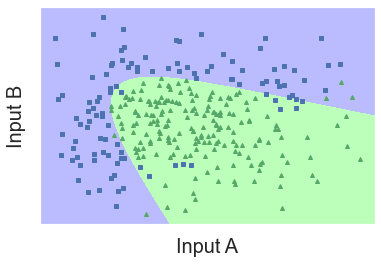

In [19]:
NN.plot_boundary(X_train)
NN.plot_data_by_label(X_train, Y_train_unencoded, 0, 'bs')
NN.plot_data_by_label(X_train, Y_train_unencoded, 1, 'g^')
plt.gca().axes.set_xlabel("Input A", fontsize=20)
plt.gca().axes.set_ylabel("Input B", fontsize=20)
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

## Plot Model

/var/folders/9_/gr09sxx135g1s84jn44jfld80000gn/T/ipykernel_84571/1075676064.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure().gca(projection="3d")


(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(1

(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3

float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1

(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(

float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1

(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(

(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(1

float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1

float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1

float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1

(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(

(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(1

(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
f

(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(

(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(1

(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3

(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(

(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(

float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1

float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1

(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(1

(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(

(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(1

(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(

float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1

(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3, 10)
(1, 10)
(11, 2)
float64
(1, 2)
(3

KeyboardInterrupt: 

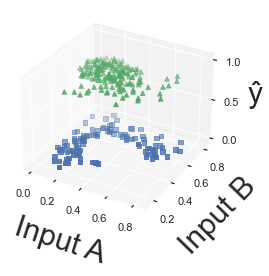

In [31]:
sns.set(rc={"axes.facecolor": "white", "figure.facecolor": "white"})
ax = plt.figure().gca(projection="3d")
ax.set_zticks([0, 0.5, 1])
ax.set_xlabel("Input A", labelpad=15, fontsize=30)
ax.set_ylabel("Input B", labelpad=15, fontsize=30)
ax.set_zlabel("ŷ", labelpad=5, fontsize=30)

blue_squares = X_train[(Y_train_unencoded == 0).flatten()]
ax.scatter(blue_squares[:, 0], blue_squares[:, 1], 0, c='b', marker='s')
green_triangles = X_train[(Y_train_unencoded == 1).flatten()]
ax.scatter(green_triangles[:, 0], green_triangles[:, 1], 1, c='g', marker='^')

MARGIN = 0.5
MESH_SIZE = 1000
x, y = np.meshgrid(np.linspace(x1.min() - MARGIN, x1.max() + MARGIN, MESH_SIZE),
                   np.linspace(x2.min() - MARGIN, x2.max() + MARGIN, MESH_SIZE))
grid = zip(np.ravel(x), np.ravel(y))
forwards = [NN.forward(np.column_stack(([i], [j]))) for i, j in grid]
print(forwards)
z = np.array([y_hat for y_hat, h in forwards])[:, 0, 1]
print(z)
z = z.reshape((MESH_SIZE, MESH_SIZE))
ax.plot_surface(x, y, z, alpha=0.75, cmap=cm.winter,
                linewidth=0, antialiased=True)
plt.show()